In [112]:
import pandas as pd
import numpy as np
import cv2
import os
import json
import matplotlib.pyplot as plt
from pycocotools.coco import COCO

In [2]:
pred = pd.read_csv('../ensemble/submission_ensemble_final.csv')

In [87]:
with open('../dataset/train.json', 'r') as f:
    train =  json.load(f)

In [113]:
coco = COCO('../dataset/train.json')
base_path = '/opt/ml/detection/dataset'

loading annotations into memory...
Done (t=0.16s)
creating index...
index created!


In [108]:
tot = 0
tot_anno = 0

comb = 0
lows = 0

bboxes = [[] for _ in range(len(train['images']))]
classes = [[] for _ in range(len(train['images']))]

for anno in train['annotations']:
    image_id = anno['image_id']
    class_id = anno['category_id']
    x1, y1, w, h = anno['bbox']
    bboxes[image_id].append([x1, y1, x1+w, y1+h])
    classes[image_id].append(class_id)

bboxes_all_imgs = [np.array(x) for x in bboxes]
classes = [np.array(x) for x in classes]

for ii, (bboxes_all, c) in enumerate(zip(bboxes_all_imgs, classes)):

    areas_all = (bboxes_all[:, 2] - bboxes_all[:, 0]) * (bboxes_all[:, 3] -bboxes_all[:, 1])
    
    bboxes = bboxes_all.copy()
    areas = areas_all.copy()
    
    for i in range(len(bboxes)):
    
        bbox1 = bboxes[i]
        
        x1 = np.maximum(bbox1[0], bboxes[:, 0])
        y1 = np.maximum(bbox1[1], bboxes[:, 1])
        x2 = np.minimum(bbox1[2], bboxes[:, 2])
        y2 = np.minimum(bbox1[3], bboxes[:, 3])

        w = np.maximum(0, x2 - x1)
        h = np.maximum(0, y2 - y1)

        areas_inter = w * h
        areas_outer = areas[i] + areas - areas_inter

        iou = areas_inter/areas_outer
        idxs_overlap = np.flatnonzero(iou >= 0.95)
        
        if len(idxs_overlap) > 1:
            print(ii, c[idxs_overlap], bboxes[idxs_overlap])
            comb += 1 / (len(idxs_overlap) -1) 
        # bboxes = bboxes[~idxs_overlap]
        # areas = areas[~idxs_overlap]
        
        #print(len(areas))
            #print(c[idxs], p[idxs], img_num)
print(comb)

635 [1 5] [[439.   55.5 808.6 635.4]
 [439.   57.6 806.  631.3]]
635 [1 5] [[439.   55.5 808.6 635.4]
 [439.   57.6 806.  631.3]]
1677 [7 1] [[   0.     0.  1023.7 1023.7]
 [   0.     0.  1023.7 1023.7]]
1677 [7 1] [[   0.     0.  1023.7 1023.7]
 [   0.     0.  1023.7 1023.7]]
2369 [1 1] [[140.2 156.7 576.3 640.8]
 [144.3 160.8 585.5 639. ]]
2369 [1 1] [[140.2 156.7 576.3 640.8]
 [144.3 160.8 585.5 639. ]]
2739 [7 1] [[ 38.9 430.2 259.3 559.2]
 [ 44.4 429.2 258.7 558.5]]
2739 [7 1] [[ 38.9 430.2 259.3 559.2]
 [ 44.4 429.2 258.7 558.5]]
3587 [7 9] [[536.1 687.7 758.8 792.3]
 [537.9 688.8 757.8 791.4]]
3587 [7 9] [[536.1 687.7 758.8 792.3]
 [537.9 688.8 757.8 791.4]]
4041 [1 1] [[   0.     0.  1023.7 1023.7]
 [   0.     0.  1023.7 1023.7]]
4041 [1 1] [[   0.     0.  1023.7 1023.7]
 [   0.     0.  1023.7 1023.7]]
12.0


In [130]:
# 이미지 랜덤 추출
imgIds = coco.getImgIds()
img = coco.loadImgs(imgIds[3587])[0]
img

{'width': 1024,
 'height': 1024,
 'file_name': 'train/3587.jpg',
 'license': 0,
 'flickr_url': None,
 'coco_url': None,
 'date_captured': '2021-03-29 16:50:04',
 'id': 3587}

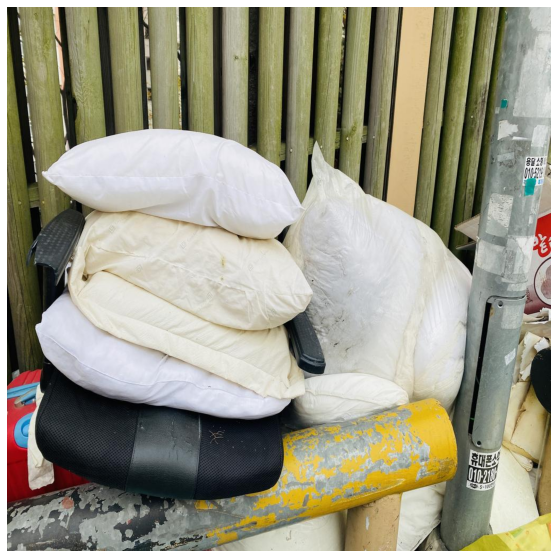

In [131]:
# 이미지 확인

plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(cv2.imread(os.path.join(base_path, img['file_name']))[...,::-1])
plt.show()

In [132]:
# 이미지의 박스는 무엇인가?

annIds = coco.getAnnIds(imgIds=img['id'], iscrowd=None)
print(annIds)
anns = coco.loadAnns(annIds)
print(anns)

[17007, 17008, 17009, 17010, 17011, 17012, 17013, 17014, 17015, 17016, 17017, 17018, 17019, 17020, 17021, 17022]
[{'image_id': 3587, 'category_id': 1, 'area': 10651.5, 'bbox': [37.8, 708.1, 52.6, 202.5], 'iscrowd': 0, 'id': 17007}, {'image_id': 3587, 'category_id': 9, 'area': 145962.46, 'bbox': [52.6, 476.8, 483.8, 301.7], 'iscrowd': 0, 'id': 17008}, {'image_id': 3587, 'category_id': 7, 'area': 190524.18, 'bbox': [517.6, 251.3, 358.6, 531.3], 'iscrowd': 0, 'id': 17009}, {'image_id': 3587, 'category_id': 9, 'area': 149713.28, 'bbox': [519.1, 350.5, 356.8, 419.6], 'iscrowd': 0, 'id': 17010}, {'image_id': 3587, 'category_id': 7, 'area': 23294.42, 'bbox': [536.1, 687.7, 222.7, 104.6], 'iscrowd': 0, 'id': 17011}, {'image_id': 3587, 'category_id': 9, 'area': 22561.74, 'bbox': [537.9, 688.8, 219.9, 102.6], 'iscrowd': 0, 'id': 17012}, {'image_id': 3587, 'category_id': 9, 'area': 129392.25, 'bbox': [111.7, 450.7, 448.5, 288.5], 'iscrowd': 0, 'id': 17013}, {'image_id': 3587, 'category_id': 9, 'a

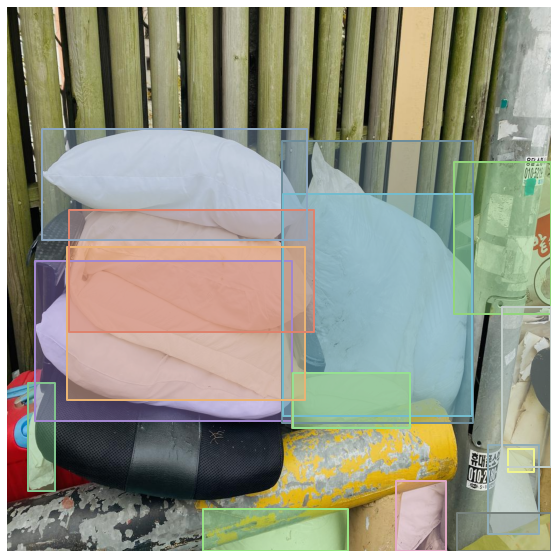

In [133]:
# Box 표시

for d in anns:
    d['segmentation'] = []

plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(cv2.imread(os.path.join(base_path, img['file_name']))[...,::-1])
coco.showAnns(anns, draw_bbox=True)
plt.show()

In [60]:
a = np.array([True, False])

In [80]:
from tqdm import tqdm

In [85]:
tot = 0
tot_anno = 0

comb = 0
lows = 0

for img_num, x, in tqdm(pred.iterrows()):
    
    xx = np.array(x['PredictionString'].split()).reshape(-1, 6)
    
    c = xx[:,0].astype(np.int32)
    p = xx[:,1].astype(np.float64)

    bboxes_all = xx[:,2:].astype(np.float64)
    
    # lows += len(np.flatnonzero(p < 0.1))
    # tot += len(c)
    
#     idxs = (p>=0.1)
    
#     c = c[idxs]
#     p = p[idxs]
#     bboxes = bboxes[idxs]

    areas_all = (bboxes_all[:, 2] - bboxes_all[:, 0]) * (bboxes_all[:, 3] -bboxes_all[:, 1])
    
    bboxes = bboxes_all.copy()
    areas = areas_all.copy()
    
    for i in range(len(bboxes)):
    
        bbox1 = bboxes[i]
        
        x1 = np.maximum(bbox1[0], bboxes[:, 0])
        y1 = np.maximum(bbox1[1], bboxes[:, 1])
        x2 = np.minimum(bbox1[2], bboxes[:, 2])
        y2 = np.minimum(bbox1[3], bboxes[:, 3])

        w = np.maximum(0, x2 - x1)
        h = np.maximum(0, y2 - y1)

        areas_inter = w * h
        areas_outer = areas[i] + areas - areas_inter

        iou = areas_inter/areas_outer
        idxs_overlap = np.flatnonzero(iou >= 0.95)
        
        if len(idxs_overlap) > 1:
            comb += 1 / (len(idxs_overlap) -1) 
        # bboxes = bboxes[~idxs_overlap]
        # areas = areas[~idxs_overlap]
        
        #print(len(areas))
            #print(c[idxs], p[idxs], img_num)
print(comb)

4871it [00:18, 263.50it/s]

88340.85436503393


In [82]:
tot = 0
tot_anno = 0

comb = 0
lows = 0

for img_num, x, in tqdm(pred.iterrows()):
    
    xx = np.array(x['PredictionString'].split()).reshape(-1, 6)
    
    c = xx[:,0].astype(np.int32)
    p = xx[:,1].astype(np.float64)

    bboxes_all = xx[:,2:].astype(np.float64)
    
    # lows += len(np.flatnonzero(p < 0.1))
    # tot += len(c)
    
#     idxs = (p>=0.1)
    
#     c = c[idxs]
#     p = p[idxs]
#     bboxes = bboxes[idxs]

    areas_all = (bboxes_all[:, 2] - bboxes_all[:, 0]) * (bboxes_all[:, 3] -bboxes_all[:, 1])
    
    bboxes = bboxes_all.copy()
    areas = areas_all.copy()
    
    while len(bboxes) or len(areas):
    
        bbox1 = bboxes[0]
        
        x1 = np.maximum(bbox1[0], bboxes[:, 0])
        y1 = np.maximum(bbox1[1], bboxes[:, 1])
        x2 = np.minimum(bbox1[2], bboxes[:, 2])
        y2 = np.minimum(bbox1[3], bboxes[:, 3])

        w = np.maximum(0, x2 - x1)
        h = np.maximum(0, y2 - y1)

        areas_inter = w * h
        areas_outer = areas[0] + areas - areas_inter

        iou = areas_inter/areas_outer
        idxs_overlap = (iou >= 0.95)
        comb += sum(idxs_overlap) - 1
        bboxes = bboxes[~idxs_overlap]
        areas = areas[~idxs_overlap]
        
        #print(len(areas))
            #print(c[idxs], p[idxs], img_num)
print(comb)

4871it [02:05, 38.86it/s]

114030


In [50]:
lows, tot

(221674, 559287)